# Climate Analysis - Aalvarez

In [1]:
#Created on Sun Oct 7 20:15:45 2018
#@author: anthonyalvarez

## References
* https://stevengoddard.wordpress.com/2014/06/27/tobs-for-dummies/
* https://chrisalbon.com/python/basics/strings_to_datetime/
* https://stackoverflow.com/questions/466345/converting-string-into-datetime
* http://strftime.org/
* https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime
* https://stackoverflow.com/questions/30487870/python-converting-strings-in-an-array-to-dates
* https://stackoverflow.com/questions/7571635/fastest-way-to-check-if-a-value-exist-in-a-list
* https://stackoverflow.com/questions/6557553/get-month-name-from-number
* https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
* http://pandas.pydata.org/pandas-docs/stable/indexing.html#selection-by-label
* https://stackoverflow.com/questions/17241004/pandas-how-to-get-the-data-frame-index-as-an-array
* https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafra
* https://stackoverflow.com/questions/24120023/strange-error-with-matplotlib-axes-labels


---
### Data Sources ![Data Sources Used](images/excelcsv_med.png "Excel Csv")

* [SQLite](Resources/hawaii.sqlite) Hawaii SQLite
* [Measurements](Resources/hawaii_measurements.csv) Measurements
* [Stations](Resources/hawaii_stations.csv) Stations


---
### JSON API Output ![JSON files](images/json-logo-med.png "JSON")

* [Precipitation](Resources/precipitation.json) Rainfall Data
* [Stations](Resources/station.json) Stations Data
* [TOBS](Resources/tobs.json) Temperature of Observation Data
* [BeginDate](Resources/begindate.json) Begin Date Data
* [BeginDate/EndDate](Resources/begindateenddate.json) Begin /End Date Data


---
### Data Visualizations

<a href="images/rainfall_analysis_001.png" target="_blank">Rainfall Analysis</a>
<img src="images/rainfall_analysis_001.png" alt="Sentiment Analysis of Media Tweets" height="600" width="400">

<a href="images/station-histogram.png" target="_blank">Station Histogram</a>
<img src="images/station-histogram.png" alt="Station Histogram" height="600" width="400">

In [2]:
%matplotlib notebook

## Dependencies


In [3]:
#MATPLOT LIB
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

#MISC IMPORTS
import numpy as np
import pandas as pd
#import datetime as dt
from datetime import datetime, timedelta

#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
#from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

## Functions

In [4]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
#daily_normals("01-01")

# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
#print(calc_temps('2012-02-28', '2012-03-05'))

### Reflect Tables into SQLAlchemy ORM

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute('SELECT * FROM measurement LIMIT 3').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0)]

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
engine.execute('SELECT * FROM station LIMIT 3').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)]

In [13]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


#### Calculate the date 1 year ago from today

In [14]:
#master_ds = session.query()
max_md = engine.execute('SELECT MAX(date) FROM measurement').first()
#max_md = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(max_md)

min_md = engine.execute('SELECT MIN(date) FROM measurement').first()
print(min_md)



('2017-08-23',)
('2010-01-01',)


---
## Precipitation Analysis

In [15]:
#clean up the list items that show up as ('2017-08-23',) to be a date format such as 2017-08-23
max_md = max_md[0]
min_md = min_md[0]

print(max_md)
print(min_md)

2017-08-23
2010-01-01


In [16]:
#convert to datetime object if needed
print(datetime.strptime(max_md,'%Y-%m-%d'))
print(datetime.strptime(min_md,'%Y-%m-%d'))

2017-08-23 00:00:00
2010-01-01 00:00:00


In [17]:
#calculate the start date from 12 months ago
months_ago = datetime.strptime(max_md,'%Y-%m-%d')
months_ago = months_ago - timedelta(days=365)
print(f'months_ago = {months_ago}')

#1 year formula
#timedelta(weeks=40, days=84, hours=23, minutes=50, seconds=600)

q_months_ago = months_ago.strftime("%Y-%m-%d")
print(f'q_months_ago = {q_months_ago}')

months_ago = 2016-08-23 00:00:00
q_months_ago = 2016-08-23


### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [18]:
#this code had every data point 
#rainfall = session.query(Measurement.date, Measurement.prcp).\
#            filter(Measurement.date > q_months_ago).order_by(Measurement.date).all()

#this code groups by each day for a total of 365
rainfall = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date > q_months_ago).group_by(Measurement.date).order_by(Measurement.date).all()
len(rainfall)

365

### Create some display text date objects

In [19]:

rainfall_from_date = months_ago.strftime('%m/%d/%y')

rainfall_to_date = datetime.strptime(max_md,'%Y-%m-%d')
rainfall_to_date = rainfall_to_date.strftime('%m/%d/%y')
print(f'From: {rainfall_from_date} - To: {rainfall_to_date}')

From: 08/23/16 - To: 08/23/17


### Load the query results into a Pandas DataFrame and set the index to the date column.

In [20]:
rainfall_df = pd.DataFrame(rainfall)
rainfall_df.head()

,date,prcp
0,2016-08-24,1.45
1,2016-08-25,0.11
2,2016-08-26,0.01
3,2016-08-27,NaN
4,2016-08-28,2.07


### Save the query results as a Pandas DataFrame and set the index to the date column

In [21]:
#Replace NAN values with 0's for plotting and setting index
rainfall_df = rainfall_df.fillna(0).set_index('date')
rainfall_df.head()

,prcp
date,
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,0.00
2016-08-28,2.07


### Use Pandas Plotting with Matplotlib to plot the data

In [22]:
#plt.figure(figsize=(6,4))
rainfall_df.columns

Index(['prcp'], dtype='object')

In [23]:
#https://stackoverflow.com/questions/17241004/pandas-how-to-get-the-data-frame-index-as-an-array
x_rf_dates = rainfall_df.index.tolist()

In [24]:
y_rf_prcp = rainfall_df["prcp"]

In [25]:
#create the tick values
ls_months = []
for rfdate in x_rf_dates:
    #print(rfdate)
    #datetime.strptime(max_md,'%Y-%m-%d')
    myrfdate = datetime.strptime(rfdate,'%Y-%m-%d').strftime('%B')
    #print(myrfdate)
    if myrfdate not in ls_months:
        ls_months.append(myrfdate)
    #break


In [26]:
ls_months

['August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July']

In [27]:
myvar = np.arange(1, len(rainfall), step=30)
#len(rainfall)
myvar

array([  1,  31,  61,  91, 121, 151, 181, 211, 241, 271, 301, 331, 361])

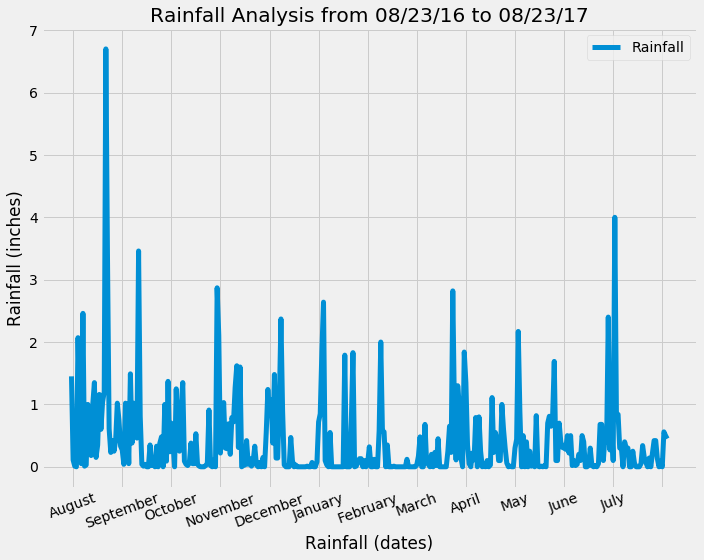

In [28]:
plt.figure(figsize=(10,8))

#plt.xticks(xtickerz, x_rf_dates, rotation=45, fontsize=5)
plt.xticks(myvar, ls_months, rotation=20)


plt.plot(x_rf_dates,y_rf_prcp, linewidth=5)

plt.xlabel("Rainfall (dates)")
plt.ylabel("Rainfall (inches)")

plt.title(f"Rainfall Analysis from {rainfall_from_date} to {rainfall_to_date}")
plt.legend(["Rainfall"])



plt.tight_layout()
plt.savefig("images/rainfall_analysis_001.png")
plt.show()

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rainfall_df.describe()

,prcp
count,365.000000
mean,0.406493
std,0.691942
min,0.000000
25%,0.000000
50%,0.110000
75%,0.530000
max,6.700000


---
# Station Analysis

### Design a query to calculate the total number of stations.

In [30]:

unique_stations = pd.DataFrame(engine.execute('SELECT COUNT(DISTINCT station) FROM station').fetchall())
print(f'Total Number of Stations is {unique_stations[0][0]}')

Total Number of Stations is 9


In [31]:
#engine.execute('SELECT COUNT(DISTINCT station) FROM station').fetchall()
#total_stations = engine.execute('SELECT COUNT(DISTINCT station) FROM station').fetchall()
total_stations = session.query(func.count(Station.station)).first()
total_stations

(9)

### Design a query to find the most active stations.

In [32]:
most_active_stations = engine.execute("SELECT count(station), station \
                                      FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()
most_active_stations

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [33]:
mostactivestations_df = pd.DataFrame(most_active_stations)
mostactivestations_df = mostactivestations_df.rename(columns={0:"Active Count",1:"Station Name"})
mostactivestations_df.head()

,Active Count,Station Name
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128


### Get the most active Station by max active count

In [34]:
mostactiveid = mostactivestations_df["Station Name"][0]
mostactiveid

'USC00519281'

---

In [35]:
activestationids = mostactivestations_df["Station Name"].values
activestationids

array(['USC00519281', 'USC00519397', 'USC00513117', 'USC00519523',
       'USC00516128', 'USC00514830', 'USC00511918', 'USC00517948',
       'USC00518838'], dtype=object)

In [36]:
sidsql = ""
for sid in activestationids:
    #print(sid)
    sidsql += "'" + sid + "',"

sidsql = sidsql[:-1].replace("''","'")
#print(sidsql[:-1])
#sidsql = sidsql[:-1]
print(sidsql)

'USC00519281','USC00519397','USC00513117','USC00519523','USC00516128','USC00514830','USC00511918','USC00517948','USC00518838'


In [37]:
##Measurement
#id INTEGER
#station TEXT
#date TEXT
#prcp FLOAT
#tobs FLOAT
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#engine.execute("SELECT id AS ID from Measurement WHERE station IN (" + sidsql + ")").fetchall()
#df = pd.DataFrame(engine.execute("SELECT station from Measurement WHERE station IN (" + sidsql + ")").fetchall())
df = pd.DataFrame(engine.execute("SELECT station, MAX(tobs) from Measurement WHERE station IN (" + sidsql + ") GROUP BY station ORDER BY MAX(tobs) DESC").fetchall())
df.head(3)


,0,1
0,USC00511918,87.0
1,USC00517948,87.0
2,USC00519397,87.0


---
### Station - Lowest Temperature Recorded

In [38]:
station_lowest_temp_df = pd.DataFrame(engine.execute("SELECT station, MIN(tobs) from \
                        Measurement WHERE station IN (" + sidsql + ") GROUP BY station ORDER BY MIN(tobs) ASC").fetchall())
station_lowest_temp_df = station_lowest_temp_df.rename(columns={0:"Station Name",1:"Lowest Temperature"})
station_lowest_temp_df.head(1)

#mostactivestations_df = mostactivestations_df.rename(columns={0:"Active Count",1:"Station Name"})
#mostactivestations_df.head()

,Station Name,Lowest Temperature
0,USC00511918,53.0


---
### Station - Highest Temperature Recorded

In [39]:
station_highest_temp_df = pd.DataFrame(engine.execute("SELECT station, MAX(tobs) from \
                        Measurement WHERE station IN (" + sidsql + ") GROUP BY station ORDER BY MAX(tobs) DESC").fetchall())
station_highest_temp_df = station_highest_temp_df.rename(columns={0:"Station Name",1:"Highest Temperature"})
station_highest_temp_df.head(3)

,Station Name,Highest Temperature
0,USC00511918,87.0
1,USC00517948,87.0
2,USC00519397,87.0


---
### Station - Average Temperature Recorded

In [40]:
station_average_temp_df = pd.DataFrame(engine.execute("SELECT AVG(tobs) from \
                        Measurement WHERE station IN (" + sidsql + ") ").fetchall())
station_average_temp_df = station_average_temp_df.rename(columns={0:"Average Active Station Temperature"})
station_average_temp_df.head()

,Average Active Station Temperature
0,73.097954


#### Choose the station with the highest number of temperature observations.

In [41]:
#mostactiveid
print(mostactiveid)

USC00519281


In [42]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_station_md = engine.execute("SELECT MAX(date) FROM measurement WHERE station = '" + mostactiveid + "'").first()
max_station_md = max_station_md[0]
print(max_station_md)

2017-08-18


In [43]:
#calculate the start date from 12 months ago
station_months_ago = datetime.strptime(max_station_md,'%Y-%m-%d')
station_months_ago = station_months_ago - timedelta(days=365)
print(f'months_ago = {months_ago}')

months_ago = 2016-08-23 00:00:00


In [44]:
q_station_months_ago = station_months_ago.strftime("%Y-%m-%d")
print(f'q_station_months_ago = {q_station_months_ago}')

q_station_months_ago = 2016-08-18


### Design a query to retrieve the last 12 months of temperature observation data (tobs).
* Filter by the station with the highest number of observations.
* Plot the results as a histogram with bins=12.



In [45]:
#this was achieved by the above date where i found the max date then i went
#one year backward and queried everything going forward
#id INTEGER
#station TEXT
#date TEXT
#prcp FLOAT
#tobs FLOAT
station_mostactive_temp_df = pd.DataFrame(engine.execute("SELECT * from \
                        Measurement WHERE station = '" + mostactiveid + "' AND date>'" + q_station_months_ago + "'").fetchall())
station_mostactive_temp_df = station_mostactive_temp_df.rename(columns={0:"id",1:"station",2:"date",3:"prcp",4:"tobs"})
station_mostactive_temp_df.head()

,id,station,date,prcp,tobs
0,14604,USC00519281,2016-08-19,0.31,79.0
1,14605,USC00519281,2016-08-20,0.13,81.0
2,14606,USC00519281,2016-08-21,0.08,79.0
3,14607,USC00519281,2016-08-22,2.32,78.0
4,14608,USC00519281,2016-08-23,1.79,77.0


In [46]:
len(station_mostactive_temp_df)

356

In [47]:
x_temp_tobs = station_mostactive_temp_df["tobs"]
plot_bins = 12

In [48]:
#i learned something really important, if you use the xlabel function and call it the wrong way, it will break the function
#for subsequent calls.
#ie. first i used it like so plt.xlabel = "Frequency"
#this then broke the xlabel, ylabel, legend and title calls after i tried to correct it like so
#plt.xlabel("Frequency")
#lesson: use appropriate function calls and stick to consistent usage

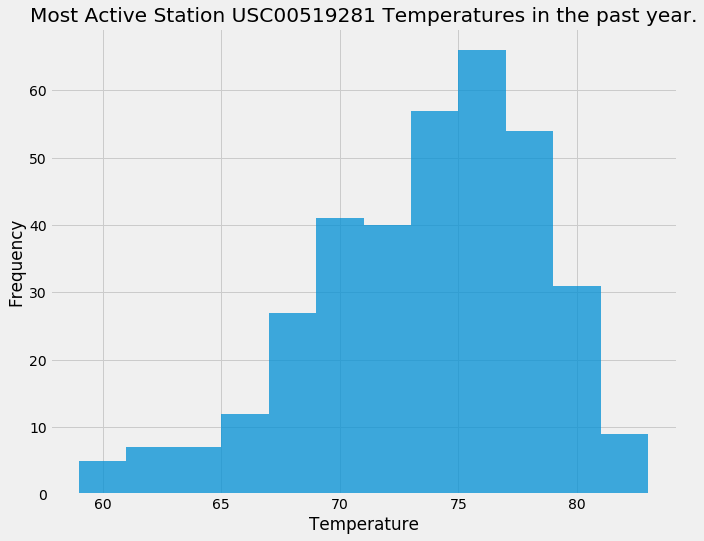

In [49]:
plt.figure(figsize=[10, 8])

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Most Active Station " + mostactiveid + " Temperatures in the past year.")
mostactive_plot = plt.hist(x_temp_tobs, plot_bins, alpha=0.75, label="TOBS")


plt.show()